**Stroke Predictor**
A stroke, also known as a cerebrovascular accident or CVA is when part of the brain loses its blood supply and the part of the body that the blood-deprived brain cells control stops working. This loss of blood supply can be ischemic because of lack of blood flow, or hemorrhagic because of bleeding into brain tissue.

The model designed in the following notebook studies and analysis data of 29065 humans have of the following features
1.Gender

2.Age 

3.Hypertension

4.Heart_disease

5.Ever_married	

6.Work_type	

7.Residence_type

8.Avg_glucose_level

9.BMI

10.Smoking_status.

In the dataset along with the 10 above features the  column at the last specifies if the person suffered 
with a stoke or not.(Yes -> 1 and No -> 0)
After analysing the 29065 rows of the dataset and it coreesponding values and results the model can predict for a person with a
set of new values if will suffer with a stroke or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('.\stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.257536,0.247430,0.228283,0.106226,0.154059
hypertension,0.257536,1.000000,0.117962,0.154052,0.129283,0.078674
heart_disease,0.247430,0.117962,1.000000,0.137482,0.022740,0.105142
avg_glucose_level,0.228283,0.154052,0.137482,1.000000,0.176936,0.075447
bmi,0.106226,0.129283,0.022740,0.176936,1.000000,-0.004039
stroke,0.154059,0.078674,0.105142,0.075447,-0.004039,1.000000


In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.shape

(29065, 11)

In [7]:
# Storing a copy of the data set. Not necessary but a good parctice when changing the structure and elements the dataset
df_copy = df

In [8]:
#Checking for null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
y = df['stroke']

In [10]:
# Using Dummies variables for tranforming the categorical features.

dummies_1 = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df.drop('gender',axis=1),dummies_1],axis=1)

dummies_2 = pd.get_dummies(df['ever_married'],drop_first=True)
df = pd.concat([df.drop('ever_married',axis=1),dummies_2],axis=1)

dummies_3 = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df.drop('work_type',axis=1),dummies_3],axis=1)

dummies_4 = pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df.drop('Residence_type',axis=1),dummies_4],axis=1)

dummies_5 = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df.drop('smoking_status',axis=1),dummies_5],axis=1)


In [11]:
df.dtypes

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
Male                   uint8
Yes                    uint8
Never_worked           uint8
Private                uint8
Self-employed          uint8
children               uint8
Urban                  uint8
never smoked           uint8
smokes                 uint8
dtype: object

In [12]:
df.shape

(29065, 15)

In [13]:
# Dropping the 'stroke' column as it is in the middle of the dataset. The later lines with transfer it at the end.
# Not necessary but makes it easy for splitting the dataset.
df = df.drop('stroke',axis=1)

In [14]:
df.columns.to_list()

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'Male',
 'Yes',
 'Never_worked',
 'Private',
 'Self-employed',
 'children',
 'Urban',
 'never smoked',
 'smokes']

In [15]:
# adds the 'stroke' columns at last position in the dataset
df['stroke'] = y

In [16]:
df.columns.to_list()

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'Male',
 'Yes',
 'Never_worked',
 'Private',
 'Self-employed',
 'children',
 'Urban',
 'never smoked',
 'smokes',
 'stroke']

In [17]:
X = df.drop('stroke',axis=1).values
y = df['stroke'].values

In [18]:
print(df.shape)
print(X.shape)
print(y.shape)

(29065, 15)
(29065, 14)
(29065,)


In [19]:
# Splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23252, 14)
(23252,)
(5813, 14)
(5813,)


In [21]:
# Scaling the train set.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
# Creating the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
# Creating an instance for early stopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [25]:
# Fitting the training set to the model and validating it on the test set.
model.fit(x=x_train_scaled,y=y_train,validation_data=(x_test_scaled,y_test),
          epochs=5,callbacks=[early_stop])

Train on 23252 samples, validate on 5813 samples
Epoch 1/5
23252/23252 [==============================] - 16s 688us/sample - loss: 0.1204 - accuracy: 0.9796 - val_loss: 0.0808 - val_accuracy: 0.9828
Epoch 2/5
23252/23252 [==============================] - 9s 397us/sample - loss: 0.0921 - accuracy: 0.9807 - val_loss: 0.0763 - val_accuracy: 0.9828
Epoch 3/5
23252/23252 [==============================] - 8s 333us/sample - loss: 0.0883 - accuracy: 0.9807 - val_loss: 0.0756 - val_accuracy: 0.9828
Epoch 4/5
23252/23252 [==============================] - 8s 337us/sample - loss: 0.0877 - accuracy: 0.9807 - val_loss: 0.0759 - val_accuracy: 0.9828
Epoch 5/5
23252/23252 [==============================] - 7s 318us/sample - loss: 0.0846 - accuracy: 0.9807 - val_loss: 0.0755 - val_accuracy: 0.9828


In [26]:
results = pd.DataFrame(model.history.history)

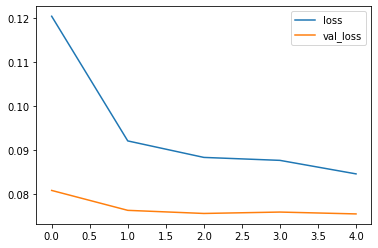

In [27]:
# Looking at the graph we can be sure that the model is not overfitting on the dataset
results[['loss','val_loss']].plot()

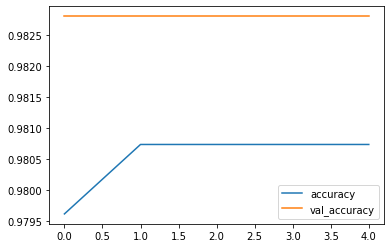

In [28]:
results[['accuracy','val_accuracy']].plot()

In [37]:
# Evaluating the model on the test set.
test_loss,test_accuracy = model.evaluate(x_test_scaled,y_test,verbose=1)

5813/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [40]:
print('Loss on test set: ',loss)

Loss on test set:  0.07547535668112018


In [41]:
print('Accuracy on test set: ',accuracy)

Accuracy on test set:  0.9827972


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  960       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  2080      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  528       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1